<a href="https://colab.research.google.com/github/dword0/Age-calculator/blob/master/MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_path = "https://www.kaggle.com/c/digit-recognizer/data?select=train.csv"
d0 = pd.read_csv("/content/train.csv")
print(d0.head())


   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [ ]:
l = d0['label']
d = d0.drop("label",axis=1)
print(d.head())

   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]


In [ ]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


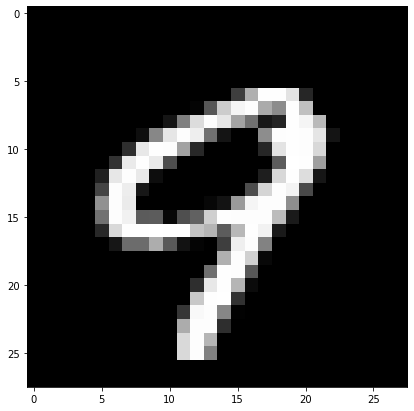

In [ ]:
 plt.figure(figsize=(7,7))
 idx = 100

 grid_data = d.iloc[idx].to_numpy().reshape(28,28)
 plt.imshow(grid_data,interpolation="none",cmap="gray")
 plt.show()



In [ ]:
labels = l
data = d


In [ ]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [ ]:
# covarience matrix for sample data s found using sample_data.T * sample_data
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T,sample_data)
print("The shape of covarience matrix is : ",covar_matrix.shape)

The shape of covarience matrix is :  (784, 784)


In [ ]:
from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [ ]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors,sample_data.T)
print("Resultant new data ",new_coordinates)

Resultant new data  [[-5.2264454   6.03299601 -1.70581328 ...  7.07627667 -4.34451279
   1.55912058]
 [-5.14047772 19.29233234 -7.64450341 ...  0.49539137  2.30724011
  -4.80767022]]


In [ ]:
new_coordinates = np.vstack((new_coordinates,labels)).T

dataframe = pd.DataFrame(data = new_coordinates,columns = ("1st principle","2nd Principle","labels"))
print(dataframe.head())

   1st principle  2nd Principle  labels
0      -5.226445      -5.140478     1.0
1       6.032996      19.292332     0.0
2      -1.705813      -7.644503     1.0
3       5.836139      -0.474207     4.0
4       6.024818      26.559574     0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


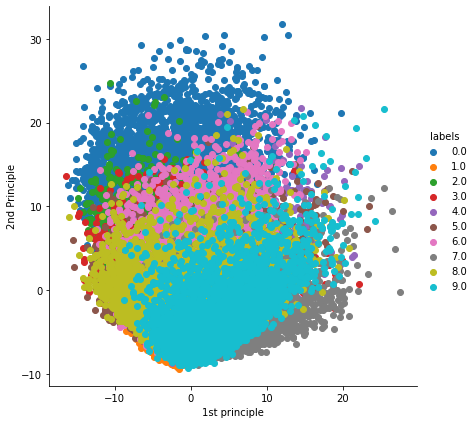

In [ ]:
import seaborn as sns
sns.FacetGrid(dataframe, hue="labels",size = 6).map(plt.scatter,'1st principle','2nd Principle').add_legend()
plt.show()

In [ ]:
#PCA using Scikit-Learn
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("shape of pca_reduced data ",pca_data.shape)

shape of pca_reduced data  (42000, 2)


In [ ]:
pca_data = np.vstack((pca_data.T,labels)).T

pca_df = pd.DataFrame(data = pca_data,columns = ("1st","2nd","label"))
sns.FacetGrid(pca_df,hue='label',size = 6).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

NameError: ignored